In [57]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

a = np.random.randint(1,10,16)
print(a)

[2 7 3 4 2 2 3 9 3 8 8 7 4 9 3 2]


d_syn[j_n] = syn[i_n] * (syn_len / (j_n - i_n)**N )

In [66]:
a_idx = np.arange(a.size)
n = 1
a_len = a.size**n - np.abs(a_idx[np.newaxis].T - a_idx)**n
# np.fill_diagonal(a_len, 0)
print(a_len)

[[16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
 [15 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2]
 [14 15 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
 [13 14 15 16 15 14 13 12 11 10  9  8  7  6  5  4]
 [12 13 14 15 16 15 14 13 12 11 10  9  8  7  6  5]
 [11 12 13 14 15 16 15 14 13 12 11 10  9  8  7  6]
 [10 11 12 13 14 15 16 15 14 13 12 11 10  9  8  7]
 [ 9 10 11 12 13 14 15 16 15 14 13 12 11 10  9  8]
 [ 8  9 10 11 12 13 14 15 16 15 14 13 12 11 10  9]
 [ 7  8  9 10 11 12 13 14 15 16 15 14 13 12 11 10]
 [ 6  7  8  9 10 11 12 13 14 15 16 15 14 13 12 11]
 [ 5  6  7  8  9 10 11 12 13 14 15 16 15 14 13 12]
 [ 4  5  6  7  8  9 10 11 12 13 14 15 16 15 14 13]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 15 14]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 15]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]]


In [67]:
d_a = np.dot(a_len, a)
print(d_a, d_a.shape)

[602 674 732 784 828 868 904 934 946 952 942 916 876 828 762 690] (16,)


In [68]:
d_a = np.dot(a, a_len)
print(d_a, d_a.shape)

[602 674 732 784 828 868 904 934 946 952 942 916 876 828 762 690] (16,)


[2 7 3 4 2 2 3 9 3 8 8 7 4 9 3 2]
[602 674 732 784 828 868 904 934 946 952 942 916 876 828 762 690]


<AxesSubplot: ylabel='0'>

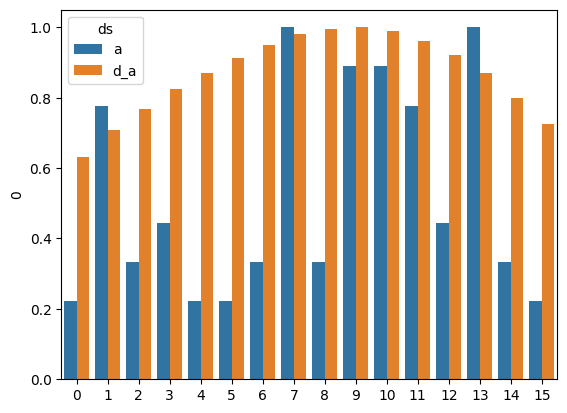

In [69]:
print(a)
print(d_a)

# sns.barplot(x=np.arange(a.size), y=a, color='red')
# my_array = np.array([np.arange(a.size), a, d_a]).T
# print(my_array)
# df = pd.DataFrame(my_array, columns = ['A','B','C'])
# sns.barplot(data=df, x='A', y='C', hue='A', palette=['blue', 'red'])
ds1 = pd.DataFrame(a/np.max(a))
ds2 = pd.DataFrame(d_a/np.max(d_a))
ds1['ds'] = 'a'
ds2['ds'] = 'd_a'
dss = pd.concat([ds1, ds2])
sns.barplot(x=dss.index, y=dss[0], hue='ds', data=dss)

[[ 32 105  42  52  24  22  30  81  24  56  48  35  16  27   6   2]
 [ 30 112  45  56  26  24  33  90  27  64  56  42  20  36   9   4]
 [ 28 105  48  60  28  26  36  99  30  72  64  49  24  45  12   6]
 [ 26  98  45  64  30  28  39 108  33  80  72  56  28  54  15   8]
 [ 24  91  42  60  32  30  42 117  36  88  80  63  32  63  18  10]
 [ 22  84  39  56  30  32  45 126  39  96  88  70  36  72  21  12]
 [ 20  77  36  52  28  30  48 135  42 104  96  77  40  81  24  14]
 [ 18  70  33  48  26  28  45 144  45 112 104  84  44  90  27  16]
 [ 16  63  30  44  24  26  42 135  48 120 112  91  48  99  30  18]
 [ 14  56  27  40  22  24  39 126  45 128 120  98  52 108  33  20]
 [ 12  49  24  36  20  22  36 117  42 120 128 105  56 117  36  22]
 [ 10  42  21  32  18  20  33 108  39 112 120 112  60 126  39  24]
 [  8  35  18  28  16  18  30  99  36 104 112 105  64 135  42  26]
 [  6  28  15  24  14  16  27  90  33  96 104  98  60 144  45  28]
 [  4  21  12  20  12  14  24  81  30  88  96  91  56 135  48 

<AxesSubplot: ylabel='0'>

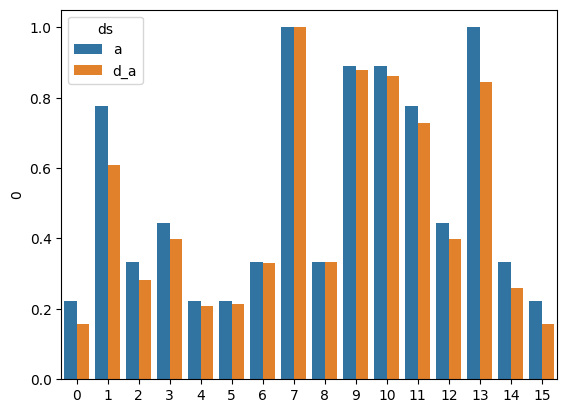

In [70]:
a_mul = a * a_len
print(a_mul)
d_a = np.sum(a_mul, axis=0)
ds1 = pd.DataFrame(a/np.max(a))
ds2 = pd.DataFrame(d_a/np.max(d_a))
ds1['ds'] = 'a'
ds2['ds'] = 'd_a'
dss = pd.concat([ds1, ds2])
sns.barplot(x=dss.index, y=dss[0], hue='ds', data=dss)

In [71]:
def get_dW(W, n = 1):
    a_idx = np.arange(W.size)
    a_len = W.size**n - np.abs(a_idx[np.newaxis].T - a_idx)**n
    np.fill_diagonal(a_len, 0)
    d_a = np.dot(W, a_len)

    return d_a

In [72]:
print(a)
dW = get_dW(a)
# print(dW / np.linalg.norm(dW))
print(dW)

[2 7 3 4 2 2 3 9 3 8 8 7 4 9 3 2]
[570 562 684 720 796 836 856 790 898 824 814 804 812 684 714 658]
